In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import xyzservices.providers as xyz
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point
from matplotlib.colors import ListedColormap

In [2]:
cf = gpd.read_file('jcf_cf.shp')
cf = cf.to_crs(epsg=4326)
jcf_towns = gpd.read_file('jcf_locations.shp')
jcf_towns.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Look at https://contextily.readthedocs.io/en/latest/intro_guide.html to get details about available tile providers.
Also, try the function cx.providers.keys()

(23.67, 23.82)

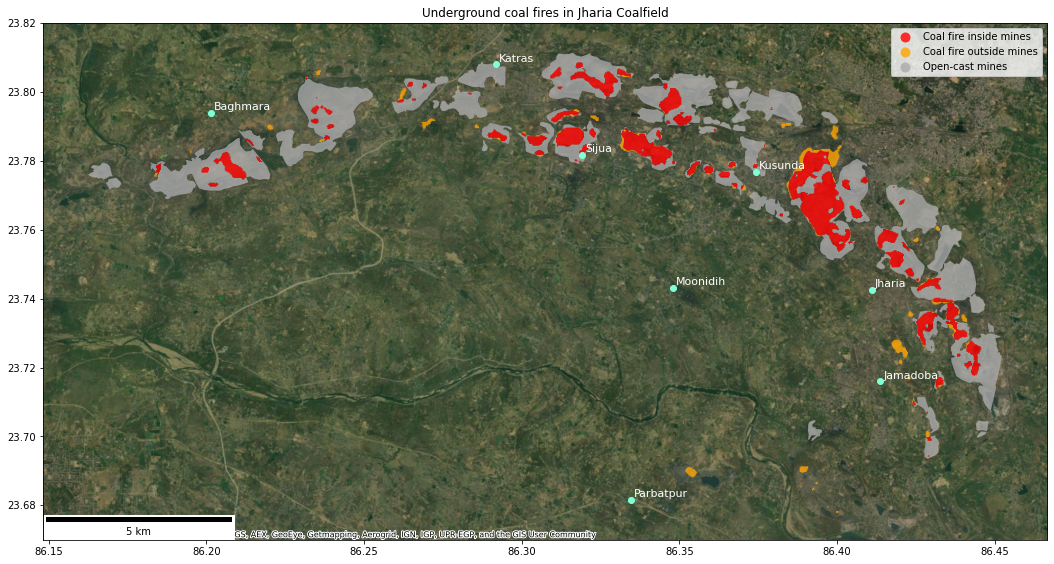

In [3]:
ax = cf.plot(column='Region', legend=True, alpha=0.8, figsize=(18,18), 
             cmap= ListedColormap(['Red', 'Orange', 'darkgrey']))       #edgecolor='Black'

cx.add_basemap(ax, crs=cf.crs, source=xyz.Esri.WorldImagery) 
jcf_towns.plot(ax=ax, color='aquamarine')

# Labelling town names
for x, y, label in zip(jcf_towns.geometry.x, jcf_towns.geometry.y, jcf_towns.Name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', color='White', size=11)

# Scale bar
points = gpd.GeoSeries([Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326)  # WGS 84
points = points.to_crs(32619) # Projected WGS 84 - meters
distance_meters = points[0].distance(points[1])
ax.add_artist(ScaleBar(distance_meters, location='lower left'))

ax.set_title("Underground coal fires in Jharia Coalfield")
ax.set_ylim(23.67, 23.82)

### Best 20 Universities in India
Source: https://www.4icu.org/in/

In [4]:
univ = gpd.read_file('best20_univ_IN.shp')

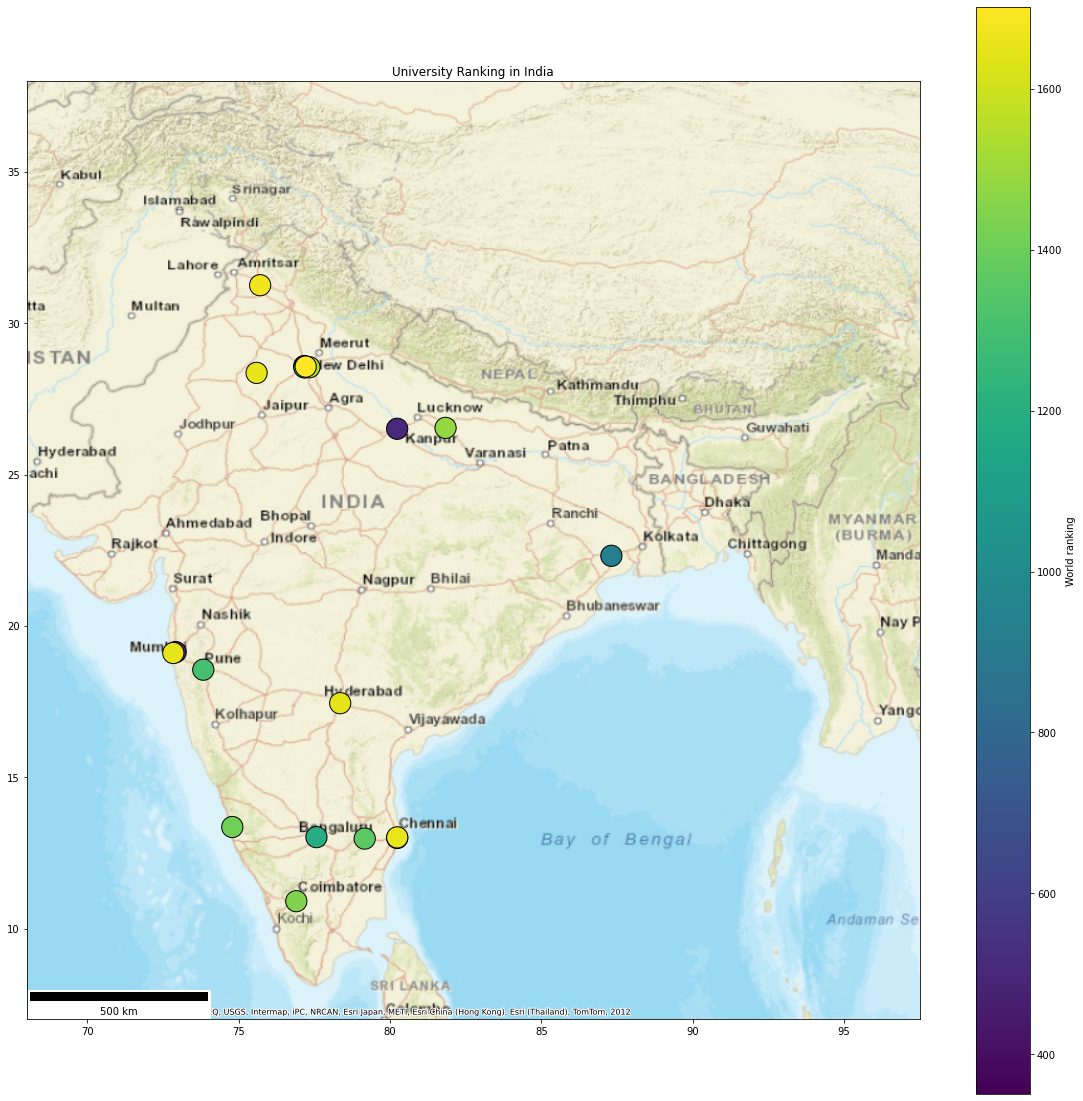

In [5]:
univ_plt = univ.plot(column='World_Rank', figsize=(20,20), legend=True, markersize =450, edgecolor='Black',
                     legend_kwds={'label':'World ranking', "orientation":"vertical"})

''' For correct map scale. It is defined above 
points = gpd.GeoSeries([Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326)  # WGS 84
points = points.to_crs(32619) # Projected WGS 84 - meters
distance_meters = points[0].distance(points[1])
'''

univ_plt.set_xlim(68, 97.5)
univ_plt.set_ylim(7, 38)

cx.add_basemap(univ_plt, crs=univ.crs, source=xyz.Esri.WorldStreetMap) 

#cx.add_basemap(univ_plt, crs=univ.crs, source=cx.providers.Stamen.TonerBackground) 
#cx.add_basemap(univ_plt, crs=univ.crs, source=cx.providers.Stamen.TonerLabels) 

univ_plt.set_title("University Ranking in India")

#for x, y, label in zip(univ.geometry.x, univ.geometry.y, univ.Name):
#    univ_plt.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

univ_plt.add_artist(ScaleBar(distance_meters, location='lower left'))